## 1. Framing the Problem 
In this tutorial, we will learn to build simple feed foward neural networks using Keras. Keras is a popular high-level deep learning API that can use either Theano or Tensorflow as a backend. Keras objects tend to represent layers and whole neural networks, as oppossed to the single operations found in either backend. You can install keras with the command pip install keras. For more details about the API, please refer to https://keras.io/

As usual, we first import some python packages.


In [32]:
from __future__ import print_function               # Allows for python3 printing
import keras 
from keras.models import Sequential                 # import the sequential model, which is a core object in Keras
from keras.layers import Dense, Activation          # import the dense layer, AKA the fully connected layer
                                                    # and Keras' library of activation functions
from keras.optimizers import RMSprop                    #  import RMSprop as optimizer

import pandas                                       # Data storage
from sklearn.model_selection import train_test_split# Splits dataset

Keras has two classes of abstract models - the “Sequential” model is an object to which you can append layers. and is simpler. The other is the “Model” class used with functional API, which is capable of building more complex models. Here we start from sequential models. In project 2, you will learn how to use functional API. 

## 2. Get the data

You should download the dataset from the github repository and make sure both "train.csv" and "test.csv" is in the same folder with this jupyter notebook file. The original dataset is from the Kaggle Competition: digital recognizer (https://www.kaggle.com/c/digit-recognizer)

In [33]:
dataset = pandas.read_csv("train.csv") # Read in data
dataset = dataset.as_matrix() # Convert to ndarray
X,y = dataset[:,1:], dataset[:,0] # Separate data points and labels

Train.csv's format:

Label,pixel0,pixel1,...,pixel783

1,0,0,...,0

`read_csv:` Will read a csv file and create a table for it.

`as_matrix:` Will convert the table into a ndarray for numpy operations

We read in our data and convert to ndarray for fast numpy operations. We also separate the data into two parts: feature vectors and labels.

## 3. Explore the data

In this section we use code to gather more information about our data. Usually the most important things we want to know about the data are: 
1. the dimension/shape of the data
2. range of the data
3. visualization of the data 

the shape of features is: (42000, 784)
the shape of labels is: (42000,)
the range of features is: 0 to 255
the range of labels is: 0 to 9
label 1 is 1
label 2 is 0
label 3 is 1
label 4 is 4
label 5 is 0


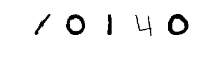

In [34]:
print ('the shape of features is:',X.shape)       #print data shape
print ('the shape of labels is:',y.shape)       #print data shape

import numpy as np
print ('the range of features is:',np.min(X),'to',np.max(X))
print ('the range of labels is:',np.min(y),'to',np.max(y))

import matplotlib.pyplot as plt
% matplotlib inline
for i in range(5):
    image = X[i]
    plt.subplot(1,10, i+1)
    image = image.reshape(28,28)
    print ('label', i+1, 'is',y[i])
    plt.imshow(image, cmap='Greys')
    plt.axis('off')

The training and testing data are 28 by 28 images, and thus the total number of features is 28 x 28 = 784.

## 4. Prepare the data
Here we need to divide it by 255 for normalization, since the features are pixels value from 0 to 255. After that, we will use function from keras **utils.to.categoriacal** to do one-hot encoding. 

In [35]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.20) # Split data

x_train = x_train/255.0                           # normalize training data
x_val = x_val/255.0                             # normalize testing data

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_val = keras.utils.to_categorical(y_val, num_classes=10)

## 5.1 Create the model
We want to set several parameters at the beginning so that we can easily see them and change them. It would also be clear to others when reading your code and try to see what parameter you used. Here the most important parameters to set are training epochs, batch size, and learning rate. 

Batch size refers to the portion of the entire sample that you want to put into the neural network for training. One epoch is when all samples are trained once. Learning rate is how fast you want the model to train, but large learning rates would likely to cause problems such as missing the optimal solution (overshoot).

In [41]:
# set parameters
batch_size = 256
epochs = 32
learning_rate = 0.0001

# build the model
model = Sequential()                                         # define model to be sequential
model.add(Dense(256, activation='relu',input_dim=784))       # first hidden layer with 256 neurons
model.add(Dense(512, activation='relu'))                     # second hidden layer with 512 neurons
model.add(Dense(1024, activation='relu'))                     # third hidden layer with 1024 neurons
model.add(Dense(10, activation='softmax'))                   # output layer
model.summary()                                              # print out summary for all layers 


my_optimizer = keras.optimizers.RMSprop(lr=learning_rate)                   # using learning rate 0.001
model.compile(optimizer=my_optimizer,                        # using SGD with our set lr as optimizer
              loss='categorical_crossentropy',               # using cross entropy loss
              metrics=['accuracy'])                          # metric that is called during evaluation

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_16 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_17 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_18 (Dense)             (None, 10)                10250     
Total params: 868,106
Trainable params: 868,106
Non-trainable params: 0
_________________________________________________________________


We set batch size to 256 and use 15 epochs. A large batch size might result to "GPU out of memory" issue, depending on the data size. We can set to a smaller batch size if the dataset is large. For epochs, the larger the number of epochs is, the more time we will need to train the model. We also used learning rate 0.001. Usually, the learning rate ranges from 0.01 to $10^{-7}$

When building the model, the first line should be **model = Sequential() **. This line in itializes a special model object called the Sequential model. This object represents our overall neural network, and it contains a list of every layer in our network, in order. We can add and remove layers to our neural network by using the model.add() method, which expects a layer object as an input, and appends that layer to the model.
We need to be careful when using a sequential model, as the order in which we add layers defines our network. We need to make sure that the 'add()' statements are used in the order that represents the network we want.

In this example, we are adding two Dense layers, each with 256 neurons and activated with the rectified linear function, follows by a 10-class softmax layer.
Whenever we use the sequential model class, we need to define the expected shape of the input vectors to our model, and we do this with the keyword input_dim, passed into the first layer of our model. We can ONLY use input_dim in the _first_ layer of a model; trying to pass in this keyword to a later layer will throw an error.

Within Keras, the name for the classic, fully-connected hidden layer is the Dense Layer. Here, we are adding two such layers. This network is fully in keeping with the material shown and discussed in the neural network chapter, and in fact we are defining exactly the kind of model you'd expect if that was the only source you had on the topic. 

Tensorflow and Theano both require that we compile the model or function we've defined. Keras, being built on those libraries, also has this requirement.

Up to the line reading 'model.summary()', we are _defining_ the unique model that we want to use. To implement this into a runnable program we must compile it. This is done with the model.compile() method. Compile() expects three arguments at least, which are the training algorithm that we want to use, the cost or loss function that is to be optimized during training, and a metric that we want the model to use during evalution.

Once a model is compiled, it will have several methods available. These include fit(), which expects a set of training points and their labels, and which trains using the loss and optimizer defined during compilation. A compiled model will also have a predict() method, which expects a set of datapoints, and returns predicted labels for the (hopefully never before seen) points. Finally, the compiled model will have the evaluate() method, expects a testing set and its labels, and which returns both the loss and 'metrics' defined at compilation, evaluated on a new set of given points and labels.

Here, we used the stochastic gradient descent optimizer, with the standard categorical_crossentropy cost function. For other optimizers check out [Keras:optimizers](https://keras.io/optimizers/). We decided on accuracy as an evaluation metric as this is standard practice; we're concerned with how many test images we will ultimately get right. 

The output of model.summary is a table specifying layers in this model and number of parameters per layer. The number of parameters is calculated with equation (# inputs)x(# neurons)+(# neurons). For example, there are 784x256+256, or 200960 parameters in the first layer.   

## 5.2 train the model
In the next cell, we train the compiled model using **model.fit**.
The first two input arguments should be training data and label, where the number of columns in the training data must match the input_shape keyword used in the first layer, and the number of columns in the label variable must equal the number of ouputs in our final softmax layer. In this case, the number of columns in x_train must be 784, and the number of columns in y_train must be 10. 

The remaning arguments are keywords that we have defined variables for already. We use the batch size and epochs specified before. Verbose refers to the depth of the 'progress reports' that keras prints at every training iteration, where 0 means no printout, 1 means a progress bar that summarizes epochs, and 2 means print out a line for every epoch. We have already defined a validation set, which we've called x_test, in a previous cell. 

As we've learned, it's important to regularize neural networks. There are many methods available for this, but here we will implement the method that is especially important for neural networks, namely _early stopping._ As it turns out, Keras has a built in method for early stopping. This is stored within the callbacks module. Callbacks are a series of functions that are run after every training iteration, that decide how trainin should proceed based on what has already occurred. Early stopping just causes the training process to end early if improvement hasn't been seen in a set number of epochs.
Besides early stopping, we need a callback that keeps track of the best performing set of weights. We use Keras' ModelCheckpoint callback to this end. This callback by default stores the current weights and their performance in a file after every iteration. We override the default, causing the method to ONLY store the best performing weights in the whole history of training, so that when training stops we can return the weights to their best performing values.

For both callbacks, we are defining performance as validation _accuracy_. The validation set is defined in the fit method, and the callbacks 
are using the keras default keyword 'val_acc' to refer to accuracy on this set.

We define our callbacks and set the parameters for each separately. We then pass the callbacks into the fit method.

In [42]:
best_weights_filepath = './best_weights.hdf5' ##define the filename to store
                                            ##the best performance and weights
earlyStopping = keras.callbacks.EarlyStopping(monitor='val_acc',
                                              patience = 5) 
#Stop training early if val_acc doesn't improve for 5 epochs

SaveBestWeights = keras.callbacks.ModelCheckpoint(best_weights_filepath,
                                                  monitor='val_acc',
                                                  save_best_only=True)
# store the historically best performing weights in best_weights_filepath
#, where performance is given by accuracy on the validation set.


model_history = model.fit(x_train, y_train,                   # training data 
                    batch_size=batch_size,                   # batch size 256
                    epochs=epochs,                           # 300 epochs 
                    verbose= 2,                              # verbose level
                    validation_data = (x_val, y_val),  #Use the previously defined x_test as a validation set. 
                    callbacks = [earlyStopping, SaveBestWeights]
                         )     
model.load_weights(best_weights_filepath) ##Set the best performing weights to the model

Train on 33600 samples, validate on 8400 samples
Epoch 1/32
 - 7s - loss: 0.8102 - acc: 0.8074 - val_loss: 0.4368 - val_acc: 0.8542
Epoch 2/32
 - 7s - loss: 0.3069 - acc: 0.9109 - val_loss: 0.2726 - val_acc: 0.9182
Epoch 3/32
 - 7s - loss: 0.2412 - acc: 0.9291 - val_loss: 0.2253 - val_acc: 0.9327
Epoch 4/32
 - 7s - loss: 0.2020 - acc: 0.9408 - val_loss: 0.2128 - val_acc: 0.9381
Epoch 5/32
 - 7s - loss: 0.1731 - acc: 0.9494 - val_loss: 0.1927 - val_acc: 0.9408
Epoch 6/32
 - 7s - loss: 0.1517 - acc: 0.9557 - val_loss: 0.1565 - val_acc: 0.9545
Epoch 7/32
 - 7s - loss: 0.1322 - acc: 0.9619 - val_loss: 0.1541 - val_acc: 0.9527
Epoch 8/32
 - 7s - loss: 0.1185 - acc: 0.9665 - val_loss: 0.1436 - val_acc: 0.9555
Epoch 9/32
 - 7s - loss: 0.1055 - acc: 0.9702 - val_loss: 0.1917 - val_acc: 0.9371
Epoch 10/32
 - 7s - loss: 0.0942 - acc: 0.9730 - val_loss: 0.1273 - val_acc: 0.9621
Epoch 11/32
 - 7s - loss: 0.0843 - acc: 0.9756 - val_loss: 0.1194 - val_acc: 0.9632
Epoch 12/32
 - 7s - loss: 0.0771 - a

## 6. Evaluate the model:Submission to Kaggle
We first need to read in the data and then convert it into a numpy array so we can perform numpy operations on it. Next, we will make predictions for the Kaggle test set. We cannot evaluate our performance on this test set, as Kaggle keeps these a secret so that we can't cheat. (Cheating is actually really easy, but they're really good at telling when it happens)

To be clear, we defined an evaluation set above

In [38]:
testset = pandas.read_csv("test.csv")             # Read data
testset = testset.as_matrix()                     # Convert to ndarray
testset = testset/255.0                             # normalize testing data
predictions = model.predict_classes(testset)           # Predict

In [39]:
submission = pandas.DataFrame(data=predictions, index=np.arange(1,len(predictions)+1), columns=['Label']) # Create dataframe
submission.index.name = 'ImageId' # Set index name

csv_text = submission.to_csv() # Convert to text

# Write to file 'submission.csv'
with open("submission1.csv",'w') as csv_file:
    csv_file.write(csv_text)

Kaggle requires our submission to be in the form:

ImageId,Label

1,1

2,8

.... 


`DataFrame:` Pandas table to store data
    
    data: data to be stored in table
     
    index: indexes for table
    
    columns: labels for table columns

We create a DataFrame to store our results and set the index name to be ImageId. We also set the indexes for the result to start at 1 and end at the length of the result.

`to_csv:` Converts DataFrame into text

We convert the DataFrame into text and write the text into csv file. After submitting our predictions to Kaggle, we are informed by them of our accuracy on the testing set. 
Again, you can submitt your own predictions to https://www.kaggle.com/c/digit-recognizer

## Conclusion
In this tutorial we have learned how to define, compile, train, evaluate, and make predictions with Keras neural networks. There are many more methods that we could use in _all_ of these stages.

Keras offers many layer types, different compile options, many optimizers and loss functions, and many more callback methods that those used here.  With the Keras API, one could build, or implement, just about any theoretically possible neural network. Every cutting edge method has some simple implementation in the API.